In [9]:
# Good Solution

import numpy as np
from scipy.misc import imread, imsave, imresize
import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage.feature import corner_harris
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from skimage import data,exposure, img_as_float
from skimage.exposure import equalize_hist 
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

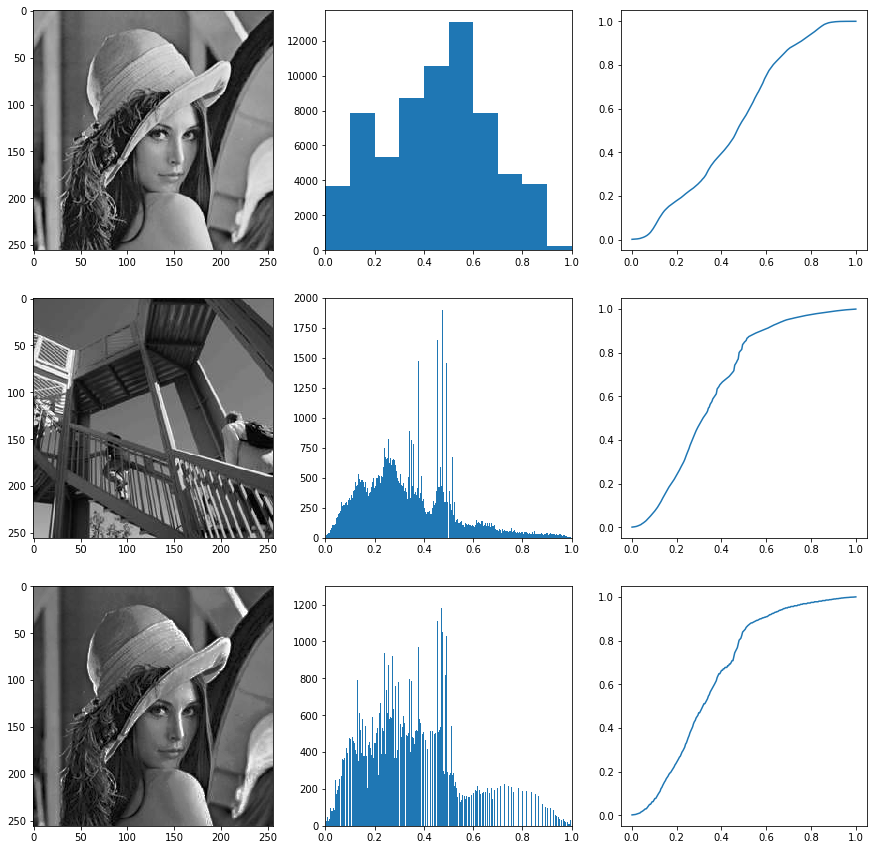

In [13]:
def histogram_match(source, target):
    source = rgb2gray(source)
    target = rgb2gray(target)
    
    img_cdf, bin_centers = exposure.cumulative_distribution(source)
    out = np.interp(img, bin_centers, img_cdf)
    # make a table for target
    m_cdf, mbin_centers = exposure.cumulative_distribution(target)
    matched = np.interp(out, m_cdf, mbin_centers)
#     matched = np.interp(out, mbin_centers,m_cdf )
    matched = np.round(matched)
    matched = np.divide(matched, 255)
    from skimage import img_as_ubyte
    matched = img_as_ubyte(matched)
    return matched

img = io.imread('lena.jpg')
target = io.imread('stairs.jpg')

matched_img = histogram_match(img, target)
img = img_as_float(img)
img.shape
img_cdf, bin_centers = exposure.cumulative_distribution(img)

target = img_as_float(target)
target_img_cdf, target_bin_centers = exposure.cumulative_distribution(target)

matched_img = img_as_float(matched_img)
matched_img_img_cdf, matched_img_bin_centers = exposure.cumulative_distribution(matched_img)

my_bins = 10

plt.figure(1, figsize=(15,15))
plt.subplot(331)
plt.imshow(img, cmap='gray')
plt.subplot(332)
plt.hist(img.flatten(), bins = my_bins, range = [0,1])
plt.xlim([0,1])
plt.subplot(333)
plt.plot(bin_centers, img_cdf)

plt.subplot(334)
plt.imshow(target, cmap='gray')
plt.subplot(335)
plt.hist(target.flatten(), bins = target_bin_centers, range = [0,1])
plt.xlim([0,1])
plt.subplot(336)
plt.plot(target_bin_centers, target_img_cdf)

plt.subplot(337)
plt.imshow(matched_img, cmap='gray')
plt.subplot(338)
plt.hist(matched_img.flatten(), bins =matched_img_bin_centers , range = [0,1])
plt.xlim([0,1])
plt.subplot(339)
plt.plot(matched_img_bin_centers, matched_img_img_cdf)
